# Notebook for Climate Data 

In [93]:
#import packages
import xarray as xr
import geopandas as gpd
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from shapely.geometry import Point
import common_paths

#Load Climate Modell 
data_pr = xr.open_dataset('../data/climate_model/PR_data_climatemodel.nc')
data_wind = xr.open_dataset('../data/climate_model/sfcWind_EUR-11_MPI-M-MPI-ESM-LR_rcp26_r2i1p1_DWD-EPISODES2018_v1-r1_mon_200601-210012.nc')
data_humid = xr.open_dataset('../data/climate_model/hurs_EUR-11_MPI-M-MPI-ESM-LR_rcp26_r2i1p1_DWD-EPISODES2018_v1-r1_mon_200601-210012.nc')
data_tempmean = xr.open_dataset('../data/climate_model/tas_EUR-11_MPI-M-MPI-ESM-LR_rcp26_r2i1p1_DWD-EPISODES2018_v1-r1_mon_200601-210012.nc')
data_tempmax = xr.open_dataset('../data/climate_model/tasmax_EUR-11_MPI-M-MPI-ESM-LR_rcp26_r2i1p1_DWD-EPISODES2018_v1-r1_mon_200601-210012.nc')
data_tempmin = xr.open_dataset('../data/climate_model/tasmin_EUR-11_MPI-M-MPI-ESM-LR_rcp26_r2i1p1_DWD-EPISODES2018_v1-r1_mon_200601-210012.nc')

#Datavariables
humid = data_humid.hurs
wind = data_wind.sfcWind
pr = data_pr.pr
tempmean = data_tempmean.tas
tempmax = data_tempmax.tasmax
tempmin = data_tempmin.tasmin

In [94]:
#Example single Data Variable Information
print("Precipitation Data Information: \n")
#relevant Data Dim
print(pr.shape,"",  sep="\n --- ")
# Datenpunkte 
print(data_pr.dims,"", sep=" \n --- ")
# Datenvariablen
print(data_pr.data_vars,"", sep="\n --- ")
#ausfürhliche Version im Text Editor anschauen sonst unvollständig
print(data_pr.info())




Precipitation Data Information: 

(1140, 412, 424)
 --- 
FrozenMappingWarningOnValuesAccess({'time': 1140, 'bnds': 2, 'rlat': 412, 'rlon': 424, 'vertices': 4}) 
 --- 
Data variables:
    time_bnds     (time, bnds) datetime64[ns] 18kB ...
    lon_bnds      (rlat, rlon, vertices) float32 3MB ...
    lat_bnds      (rlat, rlon, vertices) float32 3MB ...
    rotated_pole  int32 4B ...
    pr            (time, rlat, rlon) float32 797MB ...
 --- 
xarray.Dataset {
dimensions:
	time = 1140 ;
	bnds = 2 ;
	rlat = 412 ;
	rlon = 424 ;
	vertices = 4 ;

variables:
	datetime64[ns] time(time) ;
		time:standard_name = time ;
		time:long_name = time ;
		time:bounds = time_bnds ;
		time:axis = T ;
	datetime64[ns] time_bnds(time, bnds) ;
	float32 lon(rlat, rlon) ;
		lon:standard_name = longitude ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
		lon:bounds = lon_bnds ;
	float32 lon_bnds(rlat, rlon, vertices) ;
	float32 lat(rlat, rlon) ;
		lat:standard_name = latitude ;
		lat:long_name = latitud

In [95]:
#Metadata climate-model
#very similar
print(data_pr.attrs)
print(data_wind.attrs)
print(data_humid.attrs)
print(data_tempmean.attrs)
print(data_tempmax.attrs)

{'source': 'DWD-EPISODES2018', 'institution': 'Deutscher Wetterdienst', 'Conventions': 'CF-1.4', 'contact': 'klima.episodes@dwd.de', 'references': 'http://www.dwd.de/episodes', 'institute_id': 'DWD', 'model_id': 'DWD-EPISODES2018', 'initialization_method': '1', 'physics_version': '1', 'rcm_version_id': 'v1-r1', 'predictor_data': 'NCARv1', 'predictor_spatial_resolution': '0.75deg', 'predictor_typical_domain_size': '10W30E/40N60N', 'predictor_lonrange': '10degW30degE', 'predictor_latrange': '40degN60degN', 'predictor_number_eofs': 'NA', 'predictor_temporal_resolution': 'daily', 'predictor_names': 'zg1000, zg850, zg700, ta1000, ta850, ta700, hur1000, hur850, hur700', 'title': 'DWD-EPISODES2018 model output, forcing MPI-M-MPI-ESM-LR r2i1p1, prepared for CORDEX-ESD rcp26', 'comment': 'CORDEX Europe ESD DWD-EPISODES2018 0.11 deg EUR-11', 'project_id': 'CORDEX-ESD', 'CORDEX_domain': 'EUR-11', 'driving_experiment': 'MPI-M-MPI-ESM-LR, rcp26, r2i1p1', 'driving_model_id': 'MPI-M-MPI-ESM-LR', 'dri

In [96]:
#Merge Datasets
data_all = xr.merge([pr,tempmax,tempmean,tempmin,humid,wind], compat='override')
#conflict in height is overrided
#save height values somewhere else

# Slicing Time and Space to 2024 and Germany 
time_slice_start = "2024-01-16"
time_slice_end   = "2054-01-16"
rlon_slice_min   = -8
rlon_slice_max   = -1
rlat_slice_min   = -4
rlat_slice_max   = 6

data_all_sliced = data_all.sel(time=slice(time_slice_start,time_slice_end),
                              rlon=slice(rlon_slice_min, rlon_slice_max), rlat=slice(rlat_slice_min, rlat_slice_max))

# Datavariables 
humid = data_all_sliced.hurs
wind = data_all_sliced.sfcWind
pr = data_all_sliced.pr
tempmean = data_all_sliced.tas
tempmax = data_all_sliced.tasmax
tempmin = data_all_sliced.tasmin

In [97]:
print("Merged Dataset: \n")
#relevant Data Dim
#print(data_all.pr.shape, "", sep="\n ---")
#Datenpunkte
print(data_all.dims, "", sep="\n ---")
#Datenvariablen 
print(data_all.data_vars,"", sep="\n ---")
#ausfürhliche Version im Text Editor anschauen sonst unvollständig
print(data_all.info(), "", sep="\n ---")

Merged Dataset: 

FrozenMappingWarningOnValuesAccess({'time': 1140, 'rlat': 412, 'rlon': 424})
 ---
Data variables:
    pr       (time, rlat, rlon) float32 797MB ...
    tasmax   (time, rlat, rlon) float32 797MB ...
    tas      (time, rlat, rlon) float32 797MB ...
    tasmin   (time, rlat, rlon) float32 797MB ...
    hurs     (time, rlat, rlon) float32 797MB ...
    sfcWind  (time, rlat, rlon) float32 797MB ...
 ---
xarray.Dataset {
dimensions:
	time = 1140 ;
	rlat = 412 ;
	rlon = 424 ;

variables:
	datetime64[ns] time(time) ;
		time:standard_name = time ;
		time:long_name = time ;
		time:bounds = time_bnds ;
		time:axis = T ;
	float32 lon(rlat, rlon) ;
		lon:standard_name = longitude ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
		lon:bounds = lon_bnds ;
	float32 lat(rlat, rlon) ;
		lat:standard_name = latitude ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
		lat:bounds = lat_bnds ;
	float64 rlon(rlon) ;
		rlon:standard_name = grid_longitude ;
		rlon:long

In [98]:
print(data_all.attrs)
# das ist komisch -> aber vtt nicht schlimm 

{'standard_name': 'precipitation_flux', 'long_name': 'Precipitation', 'units': 'kg m-2 s-1', 'grid_mapping': 'rotated_pole', 'cell_methods': 'time: mean'}


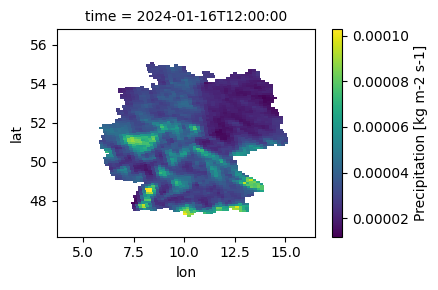

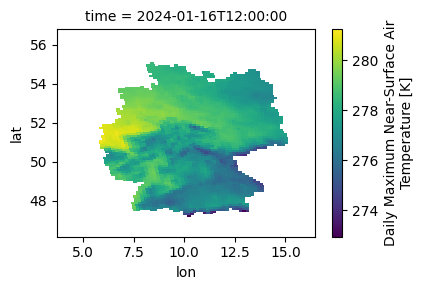

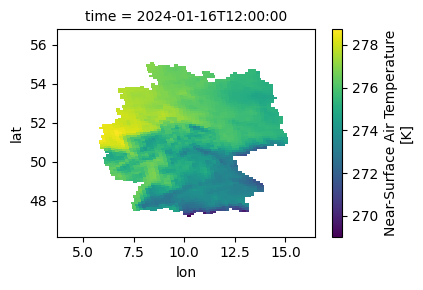

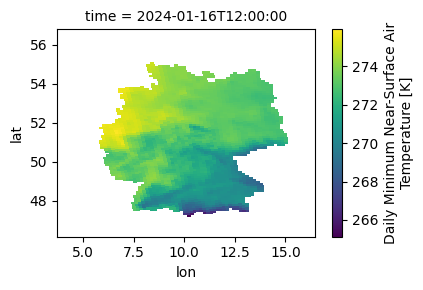

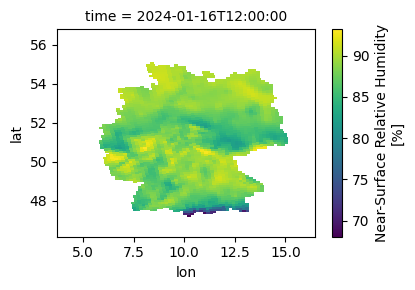

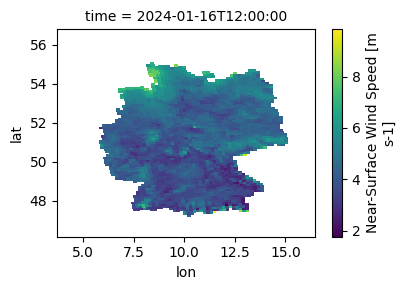

In [99]:
# Plot in Xarray 2024-01-16
data_all_sliced_plot = data_all_sliced.sel(time="2024-01-16")
variables = ['pr', 'tasmax', 'tas', 'tasmin', 'hurs', 'sfcWind']
units = [data_all.pr.attrs['units'], data_all.tasmax.attrs['units'], data_all.tas.attrs['units'],
         data_all.tasmin.attrs['units'], data_all.hurs.attrs['units'], data_all.sfcWind.attrs['units']]
n_vars = len(variables)


for i, var in enumerate(variables):
    data_all_sliced_plot[var].plot(x="lon", y="lat", col="time")

['kg m-2 s-1', 'K', 'K', 'K', '%', 'm s-1']


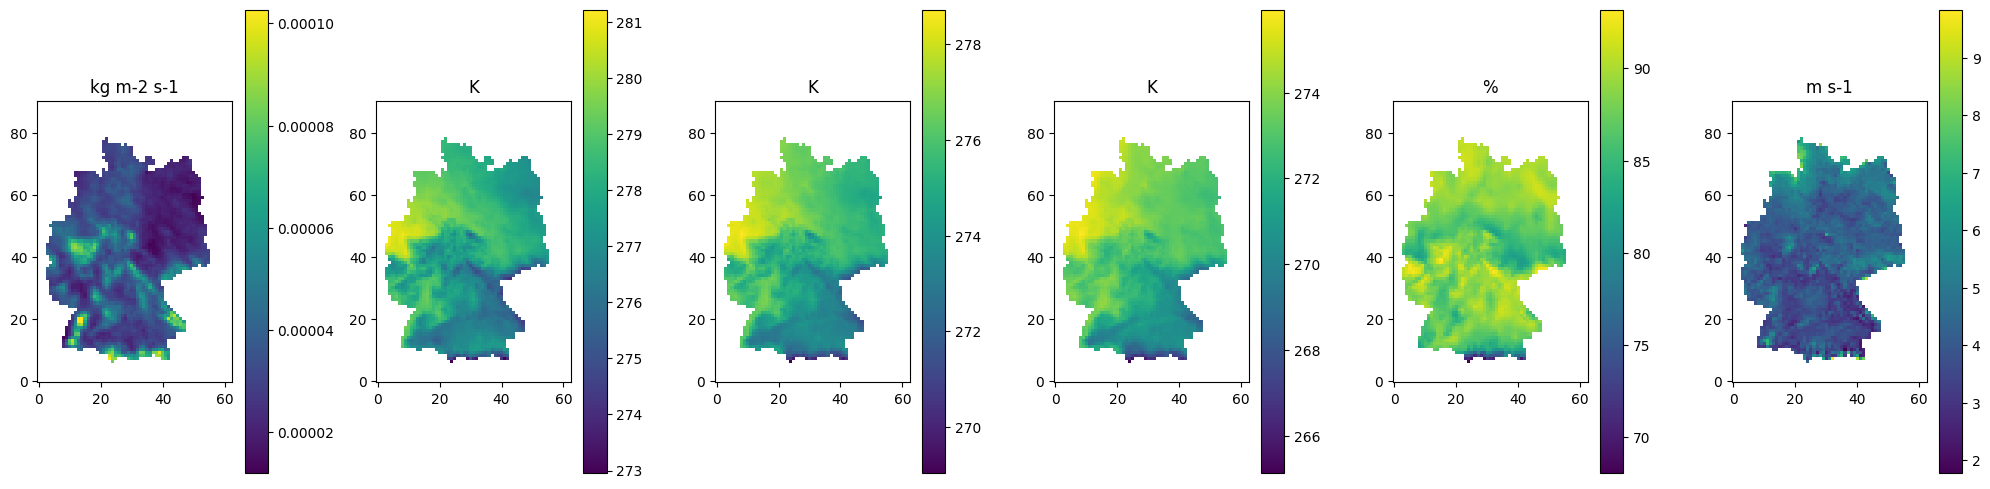

In [100]:
#Plot for with mathplotlib axes labeling not working

data_all_sliced_plot = data_all_sliced.sel(time="2024-01-16")

# Variablen, die geplottet werden sollen
variables = ['pr', 'tasmax', 'tas', 'tasmin', 'hurs', 'sfcWind']
units = [data_all.pr.attrs['units'], data_all.tasmax.attrs['units'], data_all.tas.attrs['units'],
         data_all.tasmin.attrs['units'], data_all.hurs.attrs['units'], data_all.sfcWind.attrs['units']]
n_vars = len(variables)
print(units)
# Subplots erstellen
fig, axes = plt.subplots(nrows=1, ncols=n_vars, figsize=(20, 5))

for i, var in enumerate(variables):
    ax = axes[i]
    data = data_all_sliced_plot[var].squeeze()
    # Plotten der Daten als Bild mit imshow
    im = ax.imshow(data, cmap='viridis', origin='lower')
    ax.set_title(units[i])
    fig.colorbar(im, ax=ax, orientation='vertical')

plt.tight_layout()
plt.show()

In [101]:
data_all_sliced.info()
#data_all_sliced.pr[1].plot()
print(data_all_sliced.coords)
#print(data_all_sliced.rlon.values)
print(data_all_sliced.lat.values)

xarray.Dataset {
dimensions:
	time = 361 ;
	rlat = 91 ;
	rlon = 63 ;

variables:
	datetime64[ns] time(time) ;
		time:standard_name = time ;
		time:long_name = time ;
		time:bounds = time_bnds ;
		time:axis = T ;
	float32 lon(rlat, rlon) ;
		lon:standard_name = longitude ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
		lon:bounds = lon_bnds ;
	float32 lat(rlat, rlon) ;
		lat:standard_name = latitude ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
		lat:bounds = lat_bnds ;
	float64 rlon(rlon) ;
		rlon:standard_name = grid_longitude ;
		rlon:long_name = longitude in rotated pole grid ;
		rlon:units = degrees ;
		rlon:axis = X ;
	float64 rlat(rlat) ;
		rlat:standard_name = grid_latitude ;
		rlat:long_name = latitude in rotated pole grid ;
		rlat:units = degrees ;
		rlat:axis = Y ;
	float32 pr(time, rlat, rlon) ;
		pr:standard_name = precipitation_flux ;
		pr:long_name = Precipitation ;
		pr:units = kg m-2 s-1 ;
		pr:grid_mapping = rotated_pole ;
		pr:cell_methods

In [102]:
# Load Geometry Data from shape file 
path = '../data/cmip6/'
bundeslaender = gpd.GeoDataFrame.from_file(path + 'vg2500_geo84/vg2500_bld.shp')

# Extrahieren der lat und lon Werte und Umwandeln in eindimensionale Arrays
lat_values = data_all_sliced.lat.values.flatten().tolist()
lon_values = data_all_sliced.lon.values.flatten().tolist()

# Erstellen eines DataFrames mit den Koordinaten
dataframe_coords = pd.DataFrame({'lon': lon_values, 'lat': lat_values})

# Erstellen der Geometrie
dataframe_coords['coords'] = list(zip(dataframe_coords['lon'], dataframe_coords['lat']))
dataframe_coords['coords'] = dataframe_coords['coords'].apply(Point)
points = gpd.GeoDataFrame(dataframe_coords, geometry='coords', crs=bundeslaender.crs)

# Räumliche Verknüpfung der Punkte mit den Bundesländern
pointInPolys = gpd.tools.sjoin(points, bundeslaender, predicate="within", how='left')




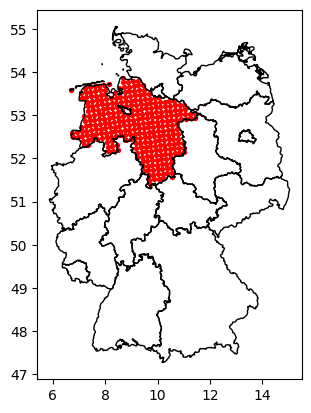

In [103]:
# Bundesland Vis aus Shape Datei 
points_niedersachsen = points[pointInPolys.GEN=='Niedersachsen']
points_bremen = points[pointInPolys.GEN=='Bremen']
base = bundeslaender.boundary.plot(linewidth=1, edgecolor="black")
#points.plot(ax=base, linewidth=1, color="blue", markersize=1)
points_niedersachsen.plot(ax=base, linewidth=1, color="red", markersize=8)
plt.show()  

In [104]:
## Add Bundesland Variable to Dataset -> calculate Bundesland for each point in dataset 

def find_nearest_indices(lat_array, lon_array, lat_value, lon_value):
    # Berechnung der Differenzen
    lat_diff = lat_array - lat_value
    lon_diff = lon_array - lon_value
    
    # Berechnung der Distanzen
    distance = np.sqrt(lat_diff**2 + lon_diff**2)
    #print(distance.shape)
    
    # Finden des Index mit dem kleinsten Abstand
    min_index = np.argmin(distance)
    #print(min_index)
    #print(lat_array.shape)
    # Entpacken der 2D-Indizes aus dem eindimensionalen Index
    lat_idx, lon_idx = np.unravel_index(min_index, lat_array.shape)
    #print(lat_array.shape)
    #print(lat_idx)
    #print(lon_idx)
    return int(lat_idx), int(lon_idx)


# Erstellen einer neuen Variable im Dataset
# Zuerst eine leere Variable initialisieren
bundesland_data = np.full((data_all_sliced.rlat.size, data_all_sliced.rlon.size), '', dtype='<U12')
bundesland_da = xr.DataArray(bundesland_data, coords=[data_all_sliced.rlat, data_all_sliced.rlon], dims=['rlat', 'rlon'])
print(bundesland_da.dims)

#Koordinaten Punkte mit Bundesländern versehen
for i, var in enumerate(bundeslaender.GEN):

    points_bundesland = points[pointInPolys.GEN == str(var)]
    print(f"Processing Bundesland: {var}")
    for idx, row in points_bundesland.iterrows():
        lat, lon = row['lat'], row['lon']
        #print("lat:",lat)
        lat_idx, lon_idx = find_nearest_indices(data_all_sliced.lat.values, data_all_sliced.lon.values, lat, lon)
        #print(f"Lat: {lat}, Lon: {lon} -> Lat_idx: {lat_idx}, Lon_idx: {lon_idx}")
        bundesland_da[lat_idx,lon_idx] = var
        
    #print[bundesland_da.values.tolist()]

data_all_sliced['Bundesland'] = bundesland_da
data_all_sliced.info()
# Überprüfen der hinzugefügten Variable
print(data_all_sliced['Bundesland'].values.tolist())


('rlat', 'rlon')
Processing Bundesland: Hamburg
Processing Bundesland: Niedersachsen
Processing Bundesland: Bremen
Processing Bundesland: Nordrhein-Westfalen
Processing Bundesland: Hessen
Processing Bundesland: Rheinland-Pfalz
Processing Bundesland: Baden-Württemberg
Processing Bundesland: Bayern
Processing Bundesland: Saarland
Processing Bundesland: Berlin
Processing Bundesland: Brandenburg
Processing Bundesland: Mecklenburg-Vorpommern
Processing Bundesland: Sachsen
Processing Bundesland: Sachsen-Anhalt
Processing Bundesland: Thüringen
Processing Bundesland: Schleswig-Holstein
xarray.Dataset {
dimensions:
	time = 361 ;
	rlat = 91 ;
	rlon = 63 ;

variables:
	datetime64[ns] time(time) ;
		time:standard_name = time ;
		time:long_name = time ;
		time:bounds = time_bnds ;
		time:axis = T ;
	float32 lon(rlat, rlon) ;
		lon:standard_name = longitude ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
		lon:bounds = lon_bnds ;
	float32 lat(rlat, rlon) ;
		lat:standard_name = latitude

['Baden-Württe' 'Bayern' 'Berlin' 'Brandenburg' 'Bremen' 'Hamburg'
 'Hessen' 'Mecklenburg-' 'Niedersachse' 'Nordrhein-We' 'Rheinland-Pf'
 'Saarland' 'Sachsen' 'Sachsen-Anha' 'Schleswig-Ho' 'Thüringen']


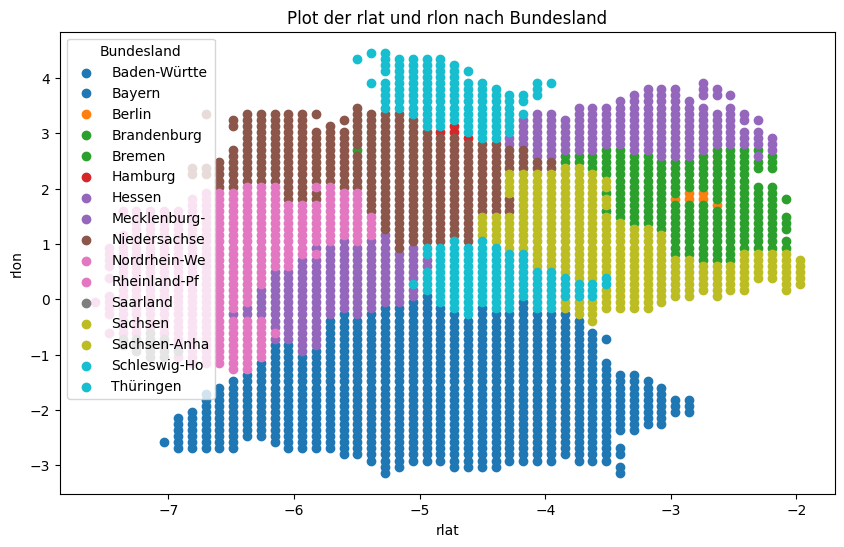

In [105]:
## Visualize Data to Bundesland 

# extract values for bundesland = all names of bundeslaender 
#base = bundeslaender.boundary.plot(linewidth=1, edgecolor="black")
bundeslaender = np.unique(data_all_sliced['Bundesland'].values)
# Delete first Entry which is ' ' -> also being a unique Value 
bundeslaender = bundeslaender[1:]
print(bundeslaender)
# different color of each bundesland 
farben = plt.get_cmap('tab10', len(bundeslaender))
farb_mapping = {bundesland: farben(i) for i, bundesland in enumerate(bundeslaender)}

# Daten plotten
plt.figure(figsize=(10, 6))
#print(bundeslaender)

bundesland_data = data_all_sliced['Bundesland'].values

for bundesland in bundeslaender:
    bundesland_mask = (bundesland_data == bundesland)

    rlat_indices, rlon_indices = np.where(bundesland_mask)
    rlat_values = data_all_sliced['rlat'].values[rlat_indices]
    rlon_values = data_all_sliced['rlon'].values[rlon_indices]

    # Erstelle eine neue Maske für das gesamte Dataset basierend auf rlat und rlon
    plt.scatter(rlon_values, rlat_values, label=bundesland, color=farb_mapping[bundesland])

plt.xlabel('rlat')
plt.ylabel('rlon')
plt.title('Plot der rlat und rlon nach Bundesland')
plt.legend(title='Bundesland')
plt.show()

In [106]:
#2 Dim array erste Dim bundesland zweite Dim für versch variablen ? 
bundesland_pr_means = {}

# Plot für den durchschnittlichen Niederschlag über die Zeit für jedes Bundesland
#plt.figure(figsize=(12, 8))

for bundesland in bundeslaender:
    bundesland_mask = (bundesland_data == bundesland)
    
    # Erstelle eine neue Maske für das gesamte Dataset basierend auf rlat und rlon
    filtered_mask = xr.DataArray(
        bundesland_mask,
        dims=["rlat", "rlon"],
        coords={"rlat": data_all_sliced['rlat'], "rlon": data_all_sliced['rlon']}
    )

    # Wende die Maske auf das Dataset an und entferne NaN-Werte
    filtered_data = data_all_sliced.where(filtered_mask, drop=True)
    precipitation_mean = filtered_data['pr'].mean(dim=["rlat", "rlon"])
    bundesland_pr_means[bundesland] = precipitation_mean.values.tolist()

print(bundesland_pr_means)
bundesland_pr_means.plot()
    #precipitation_mean = filtered_data['pr'].mean(dim=["rlat", "rlon"])
    #precipitation_mean.plot(label=bundesland, color=farb_mapping[bundesland])
    #bundesland_pr_means.plot(label=bundesland, color=farb_mapping[bundesland])
    #plt.bar(bundesland, precipitation_mean, color=farb_mapping[bundesland])
    #precipitation_mean.plot(label=bundesland, color=farb_mapping[bundesland])
    
    # Plot des durchschnittlichen Niederschlags über die Zeit
    #precipitation_mean.plot(label=bundesland, color=farb_mapping[bundesland])

#plt.title('Durchschnittlicher Niederschlag in den Bundesländern über die Zeit')
#plt.xlabel('Zeit')
#plt.ylabel('Durchschnittlicher Niederschlag (kg m-2 s-1)')
#plt.legend(title='Bundesland')
#plt.show()

[3.3144788176286966e-05, 3.3026024084392702e-06, 2.30828118219506e-05, 5.700231668015476e-06, 1.8583856217446737e-05, 1.086998418031726e-05, 2.5444296625209972e-05, 1.1238053048145957e-05, 9.780093023437075e-06, 2.2429434466175735e-05, 1.1120756425953005e-05, 3.5851626307703555e-05, 3.818511322606355e-05, 1.898354821605608e-05, 2.0749328541569412e-05, 1.4641203961218707e-05, 2.482825584593229e-05, 2.820216104737483e-05, 2.4968263460323215e-05, 2.0123954527662136e-05, 2.91956021101214e-05, 2.863649933715351e-05, 2.2337964765029028e-05, 6.263067461986793e-06, 2.6452358724782243e-05, 2.0595653040800244e-05, 2.2009409804013558e-05, 1.9531249563442543e-05, 6.478681461885571e-05, 4.1792052797973156e-05, 4.6716326323803514e-05, 3.352748171892017e-05, 3.1211420719046146e-05, 1.8443848603055812e-05, 2.3967979359440506e-05, 2.787111770885531e-05, 7.168458978412673e-06, 4.092261860932922e-06, 1.3888889043300878e-05, 1.2798996976925991e-05, 1.695042010396719e-05, 5.5362652346957475e-05, 4.86577810

AttributeError: 'dict' object has no attribute 'plot'

In [ ]:
## Visualisierung der Durschnitte ? 

# data_all_sliced.info()
data_all_sliced = data_all_sliced.isel(time=1)
print(data_all_sliced)
bundesland_data = data_all_sliced['Bundesland'].values

for bundesland in bundeslaender:
    bundesland_mask = (bundesland_data == bundesland)
    
    # Erstelle eine neue Maske für das gesamte Dataset basierend auf rlat und rlon
    filtered_mask = xr.DataArray(
        bundesland_mask,
        dims=["rlat", "rlon"],
        coords={"rlat": data_all_sliced['rlat'], "rlon": data_all_sliced['rlon']}
    )

    # Wende die Maske auf das Dataset an und entferne NaN-Werte
    filtered_data = data_all_sliced.where(filtered_mask, drop=True)
    #precipitation_mean = filtered_data['pr'].mean(dim=["rlat", "rlon", "time"]).item()

    precipitation_mean = filtered_data['pr'].mean(dim=["rlat", "rlon"])
    precipitation_mean.plot(label=bundesland, color=farb_mapping[bundesland])

In [ ]:
## Calculate Variable Means 